In [1]:
import os
os.path.expanduser('~/.keras/models')
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

In [2]:
model = ResNet152(weights='imagenet')

In [3]:
model.summary()

Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

Total params: 60,419,944
Trainable params: 60,268,520
Non-trainable params: 151,424
__________________________________________________________________________________________________


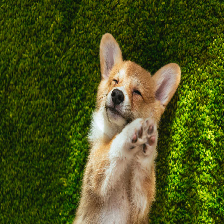

In [5]:
img = image.load_img('image.jpeg', target_size=(224, 224))
img

In [6]:
X = image.img_to_array(img)
X

array([[[32., 44.,  6.],
        [22., 39.,  5.],
        [54., 88.,  4.],
        ...,
        [16., 28.,  6.],
        [13., 24., 10.],
        [27., 50.,  8.]],

       [[37., 48., 16.],
        [38., 58.,  9.],
        [73., 90., 10.],
        ...,
        [14., 32.,  8.],
        [28., 49., 10.],
        [16., 41.,  1.]],

       [[35., 48.,  5.],
        [29., 47.,  7.],
        [28., 42.,  6.],
        ...,
        [18., 43.,  3.],
        [43., 74.,  0.],
        [53., 84.,  8.]],

       ...,

       [[27., 38.,  8.],
        [45., 67.,  5.],
        [51., 76.,  0.],
        ...,
        [40., 48.,  1.],
        [27., 40., 10.],
        [23., 36., 10.]],

       [[37., 51.,  0.],
        [38., 61.,  0.],
        [46., 68.,  4.],
        ...,
        [62., 67.,  1.],
        [57., 68.,  8.],
        [24., 38.,  2.]],

       [[47., 63.,  1.],
        [38., 58.,  9.],
        [19., 36.,  0.],
        ...,
        [31., 44.,  0.],
        [37., 60.,  0.],
        [39., 58.,  0.]]

In [7]:
X = np.expand_dims(X, axis=0)
X

array([[[[32., 44.,  6.],
         [22., 39.,  5.],
         [54., 88.,  4.],
         ...,
         [16., 28.,  6.],
         [13., 24., 10.],
         [27., 50.,  8.]],

        [[37., 48., 16.],
         [38., 58.,  9.],
         [73., 90., 10.],
         ...,
         [14., 32.,  8.],
         [28., 49., 10.],
         [16., 41.,  1.]],

        [[35., 48.,  5.],
         [29., 47.,  7.],
         [28., 42.,  6.],
         ...,
         [18., 43.,  3.],
         [43., 74.,  0.],
         [53., 84.,  8.]],

        ...,

        [[27., 38.,  8.],
         [45., 67.,  5.],
         [51., 76.,  0.],
         ...,
         [40., 48.,  1.],
         [27., 40., 10.],
         [23., 36., 10.]],

        [[37., 51.,  0.],
         [38., 61.,  0.],
         [46., 68.,  4.],
         ...,
         [62., 67.,  1.],
         [57., 68.,  8.],
         [24., 38.,  2.]],

        [[47., 63.,  1.],
         [38., 58.,  9.],
         [19., 36.,  0.],
         ...,
         [31., 44.,  0.],
        

In [8]:
np.shape(X)

(1, 224, 224, 3)

In [9]:
X = preprocess_input(X)
X

array([[[[ -97.939,  -72.779,  -91.68 ],
         [ -98.939,  -77.779, -101.68 ],
         [ -99.939,  -28.779,  -69.68 ],
         ...,
         [ -97.939,  -88.779, -107.68 ],
         [ -93.939,  -92.779, -110.68 ],
         [ -95.939,  -66.779,  -96.68 ]],

        [[ -87.939,  -68.779,  -86.68 ],
         [ -94.939,  -58.779,  -85.68 ],
         [ -93.939,  -26.779,  -50.68 ],
         ...,
         [ -95.939,  -84.779, -109.68 ],
         [ -93.939,  -67.779,  -95.68 ],
         [-102.939,  -75.779, -107.68 ]],

        [[ -98.939,  -68.779,  -88.68 ],
         [ -96.939,  -69.779,  -94.68 ],
         [ -97.939,  -74.779,  -95.68 ],
         ...,
         [-100.939,  -73.779, -105.68 ],
         [-103.939,  -42.779,  -80.68 ],
         [ -95.939,  -32.779,  -70.68 ]],

        ...,

        [[ -95.939,  -78.779,  -96.68 ],
         [ -98.939,  -49.779,  -78.68 ],
         [-103.939,  -40.779,  -72.68 ],
         ...,
         [-102.939,  -68.779,  -83.68 ],
         [ -93.939,  -

In [10]:
predictions = model.predict(X)

In [11]:
predictions

array([[2.03979471e-06, 3.68120027e-07, 1.32578881e-08, 1.16011369e-08,
        2.18433076e-08, 4.91132005e-06, 8.49149657e-08, 4.38563092e-07,
        1.81621147e-06, 2.59280955e-06, 4.56818668e-07, 1.36617007e-06,
        4.16082351e-08, 1.79565021e-07, 1.10161089e-08, 2.86156077e-08,
        3.32445502e-08, 5.82650479e-08, 9.49542937e-07, 1.69616513e-07,
        9.41133408e-07, 2.10591367e-08, 2.40300704e-08, 1.46375612e-06,
        5.30422540e-07, 1.42324112e-07, 1.96849626e-07, 1.50733641e-07,
        4.12304360e-07, 3.63694596e-07, 2.03334352e-07, 4.87753050e-06,
        2.29006432e-07, 1.66767855e-09, 2.52288856e-07, 1.14796514e-07,
        9.13524119e-08, 4.46054997e-08, 1.44552843e-07, 2.38163391e-08,
        6.95029530e-06, 1.71838703e-08, 1.34897363e-07, 3.37441897e-08,
        7.75990188e-08, 6.09344326e-08, 1.21987996e-05, 1.88636586e-05,
        5.67230529e-09, 5.10660882e-08, 1.19886977e-07, 9.25729864e-07,
        6.72379031e-07, 2.78275571e-08, 4.95246013e-08, 2.076593

In [12]:
decode_predictions(predictions, top=3)

[[('n02113023', 'Pembroke', 0.8676928),
  ('n02325366', 'wood_rabbit', 0.060834166),
  ('n02326432', 'hare', 0.027197927)]]

In [13]:
capture.release()
cv2.destroyAllWindows()

NameError: name 'capture' is not defined

In [14]:
import cv2
capture = cv2.VideoCapture(0)
while True:
    ret, frame = capture.read()
    frame = cv2.resize(frame, (224, 224))
    image = frame[...,::-1]
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    predictions = model.predict(image)
    name = decode_predictions(predictions, top=1)[0][0][1]
    cv2.putText(frame, name, (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 0))
    cv2.imshow('webcam', frame)
    if cv2.waitKey(1) == 13:
        break;
capture.release()
cv2.destroyAllWindows()